# Importar Librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Leer archivos

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.shape

(1460, 81)

In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
test.shape

(1459, 80)

# Analisis exploratorio de datos

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Descripcion de las variables


'Id': Un identificador único para cada registro de la vivienda.

'MSSubClass': El tipo de construcción de la vivienda, representado como una clase de construcción.

'MSZoning': La clasificación de la zona en la que se encuentra la vivienda (por ejemplo, zona residencial, comercial, etc.).

'LotFrontage': La longitud de la línea de frente de la propiedad.

'LotArea': El área total del lote en pies cuadrados.

'Street': El tipo de acceso a la propiedad (por ejemplo, pavimentado o de grava).

'Alley': El tipo de acceso al callejón, si lo hay.

'LotShape': La forma del lote (por ejemplo, regular o irregular).

'LandContour': La planitud del terreno (por ejemplo, nivelado o en pendiente).

'Utilities': Los servicios públicos disponibles en la propiedad.

'LotConfig': La configuración del lote (por ejemplo, esquina, dentro de un callejón, etc.).

'LandSlope': La pendiente del terreno.

'Neighborhood': El nombre del vecindario en el que se encuentra la vivienda.

'Condition1' y 'Condition2': Condiciones de cercanía a diversas características (por ejemplo, vías férreas, calles principales, etc.).

'BldgType': El tipo de edificio (por ejemplo, unifamiliar o de varios pisos).

'HouseStyle': El estilo de la casa (por ejemplo, ranchera o colonial).

'OverallQual': La calidad general de la vivienda, en una escala de 1 a 10.

'OverallCond': El estado general de la vivienda, en una escala de 1 a 10.

'YearBuilt': El año de construcción original de la vivienda.

'YearRemodAdd': El año en que se realizó la última remodelación importante.

'RoofStyle' y 'RoofMatl': El estilo y material del techo, respectivamente.

'Exterior1st' y 'Exterior2nd': Los materiales exteriores de la vivienda.

'MasVnrType' y 'MasVnrArea': El tipo y el área de revestimiento de mampostería.

'ExterQual' y 'ExterCond': La calidad de los materiales exteriores y el estado de conservación.

'Foundation': El tipo de cimentación de la vivienda.

'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF': Información relacionada con el sótano, incluyendo calidad, condición, exposición y área de terminación.

'Heating' y 'HeatingQC': El sistema de calefacción y su calidad.

'CentralAir': Si la vivienda tiene aire acondicionado central.

'Electrical': El sistema eléctrico de la vivienda.

'1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea': Áreas de diferentes niveles de la vivienda.

'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath': Número de baños completos y medios en diferentes áreas de la vivienda.

'BedroomAbvGr', 'KitchenAbvGr': Número de dormitorios y cocinas por encima del nivel del sótano.

'KitchenQual': La calidad de la cocina.

'TotRmsAbvGrd': Total de habitaciones por encima del nivel del sótano.

'Functional': La funcionalidad de la vivienda.

'Fireplaces' y 'FireplaceQu': Número de chimeneas y su calidad.

'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond': Información relacionada con el garaje, incluyendo tipo, año de construcción, acabado, capacidad y calidad.

'PavedDrive': Si el camino de entrada está pavimentado.

'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch': Áreas de diferentes tipos de terrazas y porches.

'PoolArea' y 'PoolQC': Área y calidad de la piscina.

'Fence': El tipo de valla alrededor de la propiedad.

'MiscFeature' y 'MiscVal': Características misceláneas y su valor.

'MoSold' y 'YrSold': Mes y año de venta de la vivienda.

'SaleType': El tipo de venta (por ejemplo, venta normal o subasta).

'SaleCondition': La condición de venta de la vivienda.

'SalePrice': El precio de venta de la vivienda (variable objetivo que se busca predecir).

# Vemos con que datos trabajamos

In [13]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [14]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [15]:
train.duplicated().sum()

0

In [16]:
train.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
train.isnull().sum().sum()

7829

C:\Users\juani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


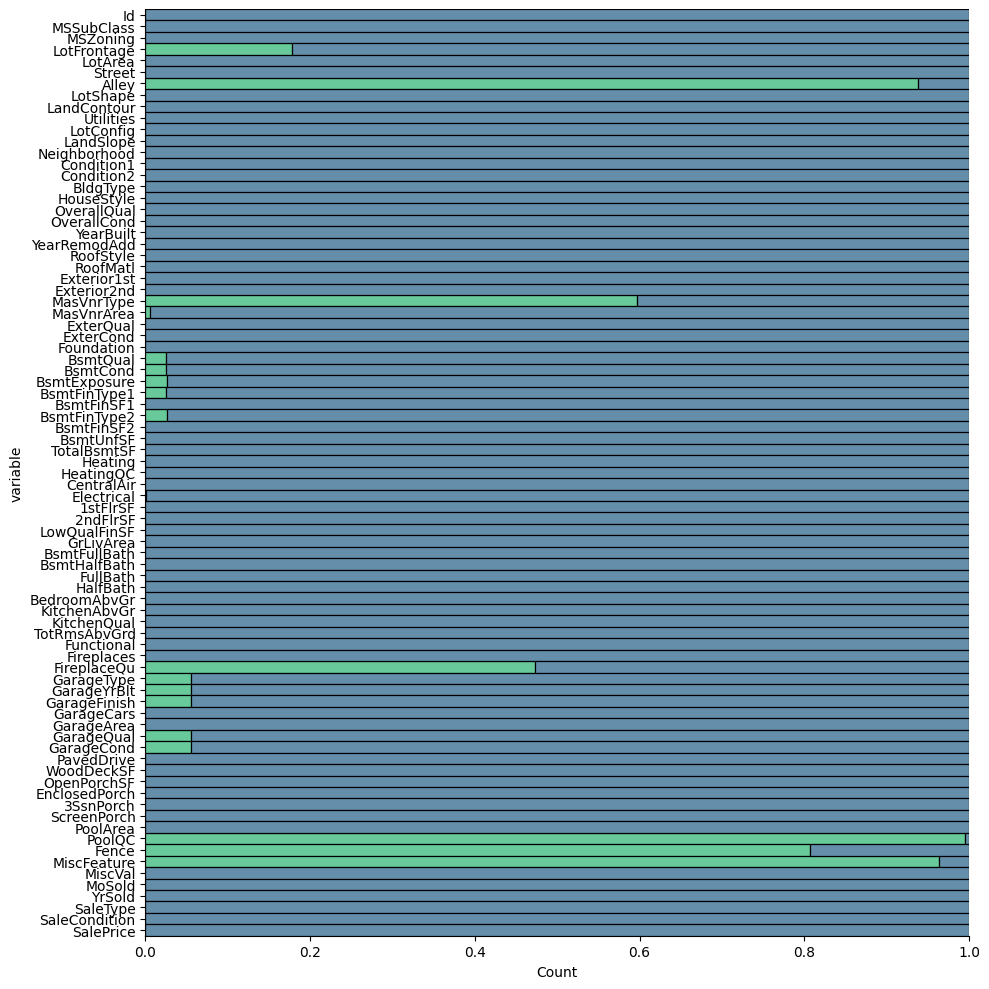

In [18]:
(df := train.isnull().melt()).pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=1,         # Reducir el aspect ratio para que sea más ancho
            height=10,        # Ajustar la altura del gráfico
            palette='viridis',# Cambiar la paleta de colores
            legend=False       # Desactivar la leyenda para ahorrar espacio
        )
    )
)

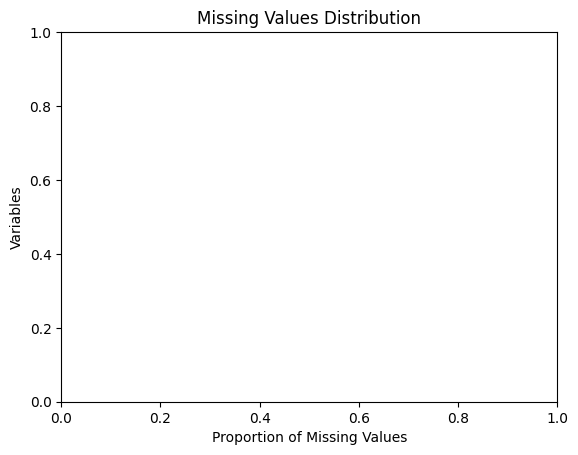

In [19]:
plt.title('Missing Values Distribution')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Variables')
plt.show()

<Axes: >

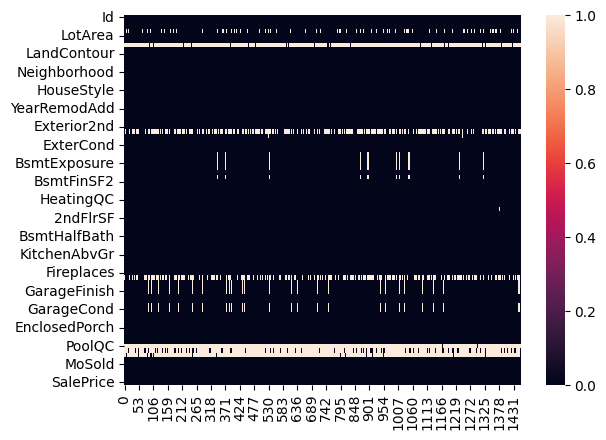

In [20]:
(train.isnull().transpose().pipe(
    lambda df: sns.heatmap(data=df)
    )
)

In [21]:
train.Electrical.isnull().sum()

1

Ver nulos en cada variables

In [22]:
nulosPorVariable = train.isnull()
cantidadDeNulosPorVariables = nulosPorVariable.sum()
variablesConNulos = cantidadDeNulosPorVariables[cantidadDeNulosPorVariables > 0]

listaVariableConNulos = list(variablesConNulos.index)

for variable in listaVariableConNulos:
    cantidadNulos = cantidadDeNulosPorVariables[variable]
    categoria = train[variable].dtype
    print(f'{variable}: {cantidadNulos}, {categoria}')

LotFrontage: 259, float64
Alley: 1369, object
MasVnrType: 872, object
MasVnrArea: 8, float64
BsmtQual: 37, object
BsmtCond: 37, object
BsmtExposure: 38, object
BsmtFinType1: 37, object
BsmtFinType2: 38, object
Electrical: 1, object
FireplaceQu: 690, object
GarageType: 81, object
GarageYrBlt: 81, float64
GarageFinish: 81, object
GarageQual: 81, object
GarageCond: 81, object
PoolQC: 1453, object
Fence: 1179, object
MiscFeature: 1406, object


In [23]:
train.LotFrontage.value_counts().sum() # Mediana

1201

In [24]:
train.Alley.value_counts() # Borrar

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [25]:
train.MasVnrType.value_counts() # Rellenar

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [26]:
train.MasVnrArea.value_counts().sum() # Mediana

1452

In [27]:
train.BsmtQual.value_counts() # Rellenar

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [28]:
train.BsmtCond.value_counts() # Rellenar

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [29]:
train.BsmtExposure.value_counts() # Rellenar

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [30]:
train.BsmtFinType1.value_counts() # Rellenar

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [31]:
train.BsmtFinType2.value_counts() # Rellenar

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [32]:
train.Electrical.value_counts() # Rellenar

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [33]:
train.FireplaceQu.value_counts() # Rellenar

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [34]:
train.GarageType.value_counts() # Rellenar

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [35]:
train.GarageCond.value_counts() # Rellenar

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [36]:
train.PoolQC.value_counts() # Borrar

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [37]:
train.Fence.value_counts() # Borrar

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [38]:
train.MiscFeature.value_counts() # Borrar

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [49]:
borrar = ['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature']
media = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
rellenar = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']

In [50]:
train2 = train.drop(labels=borrar, axis=1) # Borramos columnas en borrar

In [51]:
for x in media: # reemplazar por la mediana en las columnas numericas
  train2[x] = train2[x].fillna(train2[x].median())

In [52]:
for x in rellenar:
    train2[x] = train2[x].fillna('desconocido')

In [53]:
nulosPorVariable = train2.isnull()
cantidadDeNulosPorVariables = nulosPorVariable.sum()
variablesConNulos = cantidadDeNulosPorVariables[cantidadDeNulosPorVariables > 0]

listaVariableConNulos = list(variablesConNulos.index)

for variable in listaVariableConNulos:
    cantidadNulos = cantidadDeNulosPorVariables[variable]
    categoria = train[variable].dtype
    print(f'{variable}: {cantidadNulos}, {categoria}')

In [56]:
train2


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [67]:
# Hacer onehotencoder
target = train2['SalePrice']
trainFinal = train2.drop(labels=['SalePrice'], axis=1)
trainFinal = pd.get_dummies(train2)
trainFinal

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,True,False,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,True,False,False,False,False,True,False


In [70]:
# Hacer correlacion contra target
correlacion = trainFinal.corr()
correlacion['SalePrice'].sort_values(ascending=False)


SalePrice                  1.000000
OverallQual                0.790982
GrLivArea                  0.708624
GarageCars                 0.640409
GarageArea                 0.623431
                             ...   
GarageFinish_Unf          -0.410608
BsmtQual_TA               -0.452394
FireplaceQu_desconocido   -0.471908
KitchenQual_TA            -0.519298
ExterQual_TA              -0.589044
Name: SalePrice, Length: 287, dtype: float64

In [71]:
# Quedarnos con el top 10 columnas sin el target
top10 = correlacion['SalePrice'].sort_values(ascending=False).head(11)
top10 = top10.drop(labels=['SalePrice'])
top10

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [90]:
# Hacer un modelo de random forest con el top 10
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = trainFinal[top10.index]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [91]:
# metricas
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8378310901359013